<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_Etivity-2

In [1]:
#@title Current Date
Today = '2021-09-25' #@param {type:"date"}

In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "19137338" #@param {type:"string"}
Student_full_name = "Rana Das" #@param {type:"string"}
#@markdown ---

In [3]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = "Draft" #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [4]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

# to create data frames
from pandas import DataFrame

import numpy as np
# for Bayesian statistical modeling and probabilistic ML
import pymc3 as pm
# for exploratory analysis of Bayesian models
import arviz as az

# to plot
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#for Standardization of dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [5]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

In [6]:
def plot_box_hist(dframe, features):
    '''Function to plot Box / Histogram pair for any feature'''
    no_feats = len(features)
  
    figH = plt.figure(figsize=(30,no_feats*5))

    for i in range(0, no_feats): 
        ax1 = figH.add_subplot(no_feats, 2, (i*2)+1)
        ax1.set_title("Boxplot of "+features[i])
        dframe.boxplot(column=[features[i]])

        ax2 = figH.add_subplot(no_feats, 2, (i*2)+2)
        ax2.set_title("Histogram of "+features[i])
        dframe[features[i]].hist(bins=20)

    plt.show()

In [7]:
def remove_outliers(dframe, feature):
    '''Function to Detect and Remove Outliers'''
  
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(dframe[feature])
    random_data_mean = np.mean(dframe[feature])
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    dframe = dframe.drop(dframe[(dframe[feature] < lower_limit) | (dframe[feature] > upper_limit)].index)

    return dframe

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-ET5003/ET5003_SEM1_2021-2/tree/main/Week-3). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

### Loading Data

In [8]:
# Checking if using Google Colab (courtesy of Nigel Portley and  Michael McKegney).
RunningInCOLAB = 'google.colab' in str(get_ipython())

if RunningInCOLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    
    # paste the path here, keep quotation marks and the trailing slash
    Path = '/content/drive/MyDrive/Colab Notebooks/ET5003/e-tivity-2/'
else:
    Path = './'

In [9]:
# House Data
train_data = Path + 'house_train.csv'
test_data = Path + 'house_test.csv'
cost_data = Path + 'true_price.csv'

# train data
df_train = pd.read_csv(train_data)

# test data
df_test = pd.read_csv(test_data)

# test data
df_cost = pd.read_csv(cost_data)

## Exploratory Data Analysis

Exploratory Data Analysis is an approach for Data Analysis that employs a variety of techniques to-


*   Gain intuition about the data.
*   Conduct sanity checks. (To be sure that insights we are drawing are actually from the right dataset).
*    Find out where data is missing.
*    Check if there are any outliers.
*    Summarize the data.

### Steps in Exploratory Data Analysis
<img src = "https://cdn.analyticsvidhya.com/wp-content/uploads/2020/10/image7-5.png"/>


# Examination -- EDA

## 1. House Data

We examine house *Train* and *Test* Dataset from *house_train.csv* & *house_test.csv* resp.

### 1.1 Variable Identification

In [10]:
print('Shape of Training Data : ', df_train.shape)
print('Shape of Test Data : ', df_test.shape)

print('Train Data Columns',df_train.columns)
print('Test Data Columns',df_test.columns)

print(df_train.info())
print(df_test.info())

Shape of Training Data :  (2982, 17)
Shape of Test Data :  (500, 16)
Train Data Columns Index(['ad_id', 'area', 'bathrooms', 'beds', 'ber_classification', 'county',
       'description_block', 'environment', 'facility', 'features', 'latitude',
       'longitude', 'no_of_units', 'price', 'property_category',
       'property_type', 'surface'],
      dtype='object')
Test Data Columns Index(['ad_id', 'area', 'bathrooms', 'beds', 'ber_classification', 'county',
       'description_block', 'environment', 'facility', 'features', 'latitude',
       'longitude', 'no_of_units', 'property_category', 'property_type',
       'surface'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 17 columns):
ad_id                 2982 non-null int64
area                  2982 non-null object
bathrooms             2931 non-null float64
beds                  2931 non-null float64
ber_classification    2305 non-null object
county                

In [11]:
df_train.head()

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
0,996887,Portmarnock,NaN,NaN,NaN,Dublin,A SELECTION OF 4 AND 5 BEDROOM FAMILY HOMES LO...,prod,NaN,None,53.418216,-6.149329,18.0,NaN,new_development_parent,NaN,NaN
1,999327,Lucan,NaN,NaN,NaN,Dublin,**Last 2 remaining houses for sale ***\n\nOn v...,prod,NaN,None,53.364917,-6.454935,3.0,NaN,new_development_parent,NaN,NaN
2,999559,Rathfarnham,NaN,NaN,NaN,Dublin,Final 4 &amp; 5 Bedroom Homes for Sale\n\nOn V...,prod,NaN,None,53.273447,-6.313821,3.0,NaN,new_development_parent,NaN,NaN
3,9102986,Balbriggan,NaN,NaN,NaN,Dublin,"Glenveagh Taylor Hill, Balbriggan\n\r\n*Ideal ...",prod,NaN,None,53.608167,-6.210914,30.0,NaN,new_development_parent,NaN,NaN
4,9106028,Foxrock,NaN,NaN,NaN,Dublin,*New phase launching this weekend Sat &amp; Su...,prod,NaN,None,53.262531,-6.181527,8.0,NaN,new_development_parent,NaN,NaN


In [12]:
df_train.tail()

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
2977,12428232,Ballsbridge,2.0,2.0,C3,Dublin,Sherry FitzGerald are delighted to present Apa...,prod,NaN,Prime Location\nManagement Co: Core Property M...,53.338738,-6.237199,NaN,415000.0,sale,apartment,56.0
2978,12428240,Rialto,1.0,3.0,B2,Dublin,Property Team Patrick Moran is delighted to pr...,prod,NaN,Totally refurbished to the highest standard. \...,53.335793,-6.294268,NaN,485000.0,sale,terraced,101.0
2979,12428247,Smithfield,1.0,2.0,C3,Dublin,Earnest estate agents are delighted to present...,prod,Wired for Cable Television,OVERLOOKING THE RIVER LIFFEY \n3RD FLOOR APART...,53.346098,-6.276856,NaN,299000.0,sale,apartment,55.6
2980,12428254,Foxrock,2.0,3.0,C3,Dublin,Janet Carroll Estate Agents are pleased to pre...,prod,"Parking,Gas Fired Central Heating",None,53.273518,-6.178500,NaN,495000.0,sale,end-of-terrace,97.0
2981,12428358,Terenure,2.0,3.0,D2,Dublin,ON VIEW SATURDAY 7 TH MARCH 2020 11:30 AM - 12...,prod,NaN,Charming three-bedroom family home\nMinutes aw...,53.310073,-6.325158,NaN,525000.0,sale,semi-detached,129.3


In [13]:
df_test.head()

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,property_category,property_type,surface
0,12373510,Skerries,2.0,4.0,G,Dublin,"It's all in the name ""Island View"";. Truly won...",prod,"Parking,Alarm,Oil Fired Central Heating",Breath-taking panoramic views radiate from thi...,53.566881,-6.101148,NaN,sale,bungalow,142.0
1,12422623,Lucan,2.0,3.0,C1,Dublin,REA McDonald - Lucan' s longest established es...,prod,NaN,Gas fired central heating.\nDouble glazed wind...,53.362992,-6.452909,NaN,sale,terraced,114.0
2,12377408,Swords,3.0,4.0,B3,Dublin,REA Grimes are proud to present to the market ...,prod,NaN,Pristine condition throughout\nHighly sought-a...,53.454198,-6.262964,NaN,sale,semi-detached,172.0
3,12420093,Lucan,4.0,3.0,A3,Dublin,"REA McDonald, Lucan' s longest established est...",prod,NaN,A-rated home within a short walk of Lucan Vill...,53.354402,-6.458647,NaN,sale,semi-detached,132.4
4,12417338,Clondalkin,1.0,3.0,E2,Dublin,"Hibernian Auctioneers are delighted to bring, ...",prod,"Parking,Gas Fired Central Heating,Wired for Ca...",Mature Location \nGas Heating \nClose to Ameni...,53.336530,-6.393587,NaN,sale,semi-detached,88.0


In [14]:
df_test.tail()

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,property_category,property_type,surface
495,12369815,Ringsend,1.0,2.0,NaN,Dublin,***SUPERB LOCATION / PRIVATE PARKING OPTION AV...,prod,NaN,Adjacent to Grand Canal Dock\nClose to a host ...,53.342207,-6.226101,NaN,sale,apartment,65.0
496,12416011,Cabinteely,3.0,5.0,E1,Dublin,"OPEN VIEWING SATURDAY 7TH MARCH, 10.00AM - 10....",prod,"Parking,Alarm,Oil Fired Central Heating",Excellently presented 5 bedroom family home\nE...,53.261475,-6.147720,NaN,sale,detached,191.3
497,12232222,Artane,1.0,3.0,G,Dublin,Sherry FitzGerald is delighted to present to t...,prod,NaN,Detached Family Home\nOnly One Owner\nMature C...,53.391619,-6.205157,NaN,sale,detached,105.0
498,11905630,Clontarf,2.0,4.0,E2,Dublin,Modernised yet still in touch with it's period...,prod,"Parking,Gas Fired Central Heating,Alarm,Wired ...",Stunning coastal views.\nExcellent condition t...,53.360578,-6.183701,NaN,sale,end-of-terrace,130.0
499,12394865,Drumcondra,2.0,2.0,C1,Dublin,MOVEHOME ESTATE AGENTS .. are delighted to pre...,prod,NaN,* Spacious two Bedroom master ensuite apartmen...,53.366827,-6.248329,NaN,sale,apartment,71.0


Use the following to get some high level information about the missing data.
Then later we drop the columns with  mostly null values.

In [15]:
df_train.isna().sum()

ad_id                    0
area                     0
bathrooms               51
beds                    51
ber_classification     677
county                   0
description_block        0
environment              0
facility              2017
features                 0
latitude                 0
longitude                0
no_of_units           2923
price                   90
property_category        0
property_type           51
surface                551
dtype: int64

***
Columns to drop from above : *no_of_units, facility, surface*

*description_block and features* is a descriptive text which will add very little valie. Also to be dropped
***

In [16]:
# Find the number of nulls/NaNs in the dataset as a percentage to see if any columns need to be considered for removal
print("Missing values as percentage of Train data set")
df_train.isna().sum()*100/len(df_train)

Missing values as percentage of Train data set


ad_id                  0.000000
area                   0.000000
bathrooms              1.710262
beds                   1.710262
ber_classification    22.702884
county                 0.000000
description_block      0.000000
environment            0.000000
facility              67.639168
features               0.000000
latitude               0.000000
longitude              0.000000
no_of_units           98.021462
price                  3.018109
property_category      0.000000
property_type          1.710262
surface               18.477532
dtype: float64

In [17]:
df_test.isna().sum()

ad_id                   0
area                    0
bathrooms               0
beds                    0
ber_classification     56
county                  0
description_block       0
environment             0
facility              311
features                0
latitude                0
longitude               0
no_of_units           500
property_category       0
property_type           0
surface                 0
dtype: int64

In [18]:
print("Missing values as percentage of Test data set")
df_test.isna().sum()*100/len(df_test)

Missing values as percentage of Test data set


ad_id                   0.0
area                    0.0
bathrooms               0.0
beds                    0.0
ber_classification     11.2
county                  0.0
description_block       0.0
environment             0.0
facility               62.2
features                0.0
latitude                0.0
longitude               0.0
no_of_units           100.0
property_category       0.0
property_type           0.0
surface                 0.0
dtype: float64

***
Columns to drop from above : *no_of_units, facility*

*description_block and features* is a descriptive text which will add very little valie. Also to be dropped
***

### 1.2 Univariate Analysis

### 1.3 Multi Variate Analysis

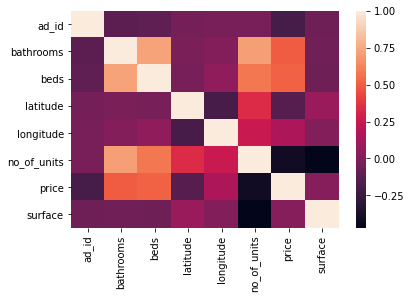

In [19]:
# calculate the correlation matrix
corr = df_train.corr()

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns);

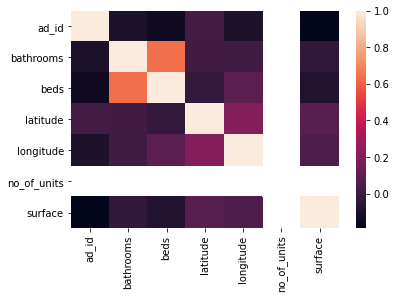

In [20]:
# calculate the correlation matrix
corr = df_test.corr()

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns);

In [21]:
# df_train[['latitude', 'longitude', 'bathrooms', 'beds', 'surface']].describe()

### 1.4 Missing Value Treatment

In [22]:
# As discussed above, here we are dropping columns with mist missing values. 
drop_features_train = ['surface', 'no_of_units', 'facility', 'description_block', 'features', 'county']
#this didn;t work, not sure why
# df_train.drop(drop_features_train, axis=1)

df_train.drop('surface', axis=1, inplace=True)
df_train.drop('no_of_units', axis=1, inplace=True)
df_train.drop('facility', axis=1, inplace=True)
df_train.drop('description_block', axis=1, inplace=True)
df_train.drop('features', axis=1, inplace=True)


drop_features_test = ['no_of_units', 'facility', 'description_block', 'features', 'county']
#this didn;t work, not sure why
# df_test.drop(drop_features_test, axis=1)
df_test.drop('no_of_units', axis=1, inplace=True)
df_test.drop('facility', axis=1, inplace=True)
df_test.drop('description_block', axis=1, inplace=True)
df_test.drop('features', axis=1, inplace=True)

# In that regard County doesn;'t add much values, so we drop county.
df_train.drop('county', axis=1, inplace=True)
df_test.drop('county', axis=1, inplace=True)

df_train.drop('environment', axis=1, inplace=True)
df_test.drop('environment', axis=1, inplace=True)


### 1.4 Transformation
Apply the transformer on the train dataset and the test dataset

#### Location Mapping

In [23]:
# i have read Pierluigi's post and felt we can automate this mapping step as opposed to mnually creating the dictionary. 
def create_values_mapper(values_from_dataset):
    area_mapper = {}
    # get unique values first
    unique_areas = values_from_dataset.unique()
    # Sort them alphabetically for ease
    areas = np.sort(unique_areas)[::1]
    for count, area in enumerate(areas):
        area_mapper[area]= count
    return area_mapper

In [24]:
area_mapper = create_values_mapper(df_train['area'])
df_train['area'] = df_train['area'].replace(area_mapper)

area_mapper = create_values_mapper(df_test['area'])
df_test['area'] = df_test['area'].replace(area_mapper)

#### Property Type Mapping

In [25]:
ptypes = df_train['property_type'].unique()
property_type_mapper = {}
for count, ptype in enumerate(ptypes):
    property_type_mapper[ptype]= count

In [26]:
df_train["property_type"] = df_train["property_type"].replace(property_type_mapper)

df_test["property_type"] = df_test["property_type"].replace(property_type_mapper)

#### BER Classification Mapping

In [27]:
ber_types = df_train['ber_classification'].unique()
ber_mapper = {}
for count, ber_type in enumerate(ber_types):
    ber_mapper [ber_type]= count

In [28]:
df_train["ber_classification"] = df_train["ber_classification"].replace(ber_mapper)
df_test["ber_classification"] = df_test["ber_classification"].replace(ber_mapper)

df_train['ber_classification'].fillna(df_train['ber_classification'].median(), inplace=True)
df_test['ber_classification'].fillna(df_test['ber_classification'].median(), inplace=True)

#### Property Category Mapping

In [29]:
property_category_mapper = {
    "sale": 0,
    "new_development_parent": 1
}

df_train['property_category'] = df_train['property_category'].replace(property_category_mapper)
df_test['property_category'] = df_test['property_category'].replace(property_category_mapper)

In [30]:
df_train.dropna(subset=['bathrooms'], inplace=True)
df_train.dropna(subset=['price'], inplace=True)

In [31]:
df_train.tail(5)

,ad_id,area,bathrooms,beds,ber_classification,latitude,longitude,price,property_category,property_type
2977,12428232,9,2.0,2.0,8,53.338738,-6.237199,415000.0,0,3
2978,12428240,128,1.0,3.0,11,53.335793,-6.294268,485000.0,0,4
2979,12428247,139,1.0,2.0,8,53.346098,-6.276856,299000.0,0,3
2980,12428254,69,2.0,3.0,8,53.273518,-6.178500,495000.0,0,8
2981,12428358,149,2.0,3.0,9,53.310073,-6.325158,525000.0,0,2


In [32]:
df_test.tail()

,ad_id,area,bathrooms,beds,ber_classification,latitude,longitude,property_category,property_type,surface
495,12369815,98,1.0,2.0,0,53.342207,-6.226101,0,3,65.0
496,12416011,16,3.0,5.0,12,53.261475,-6.147720,0,1,191.3
497,12232222,0,1.0,3.0,4,53.391619,-6.205157,0,1,105.0
498,11905630,28,2.0,4.0,3,53.360578,-6.183701,0,8,130.0
499,12394865,39,2.0,2.0,5,53.366827,-6.248329,0,3,71.0


### 1.5 Outlier Treatment

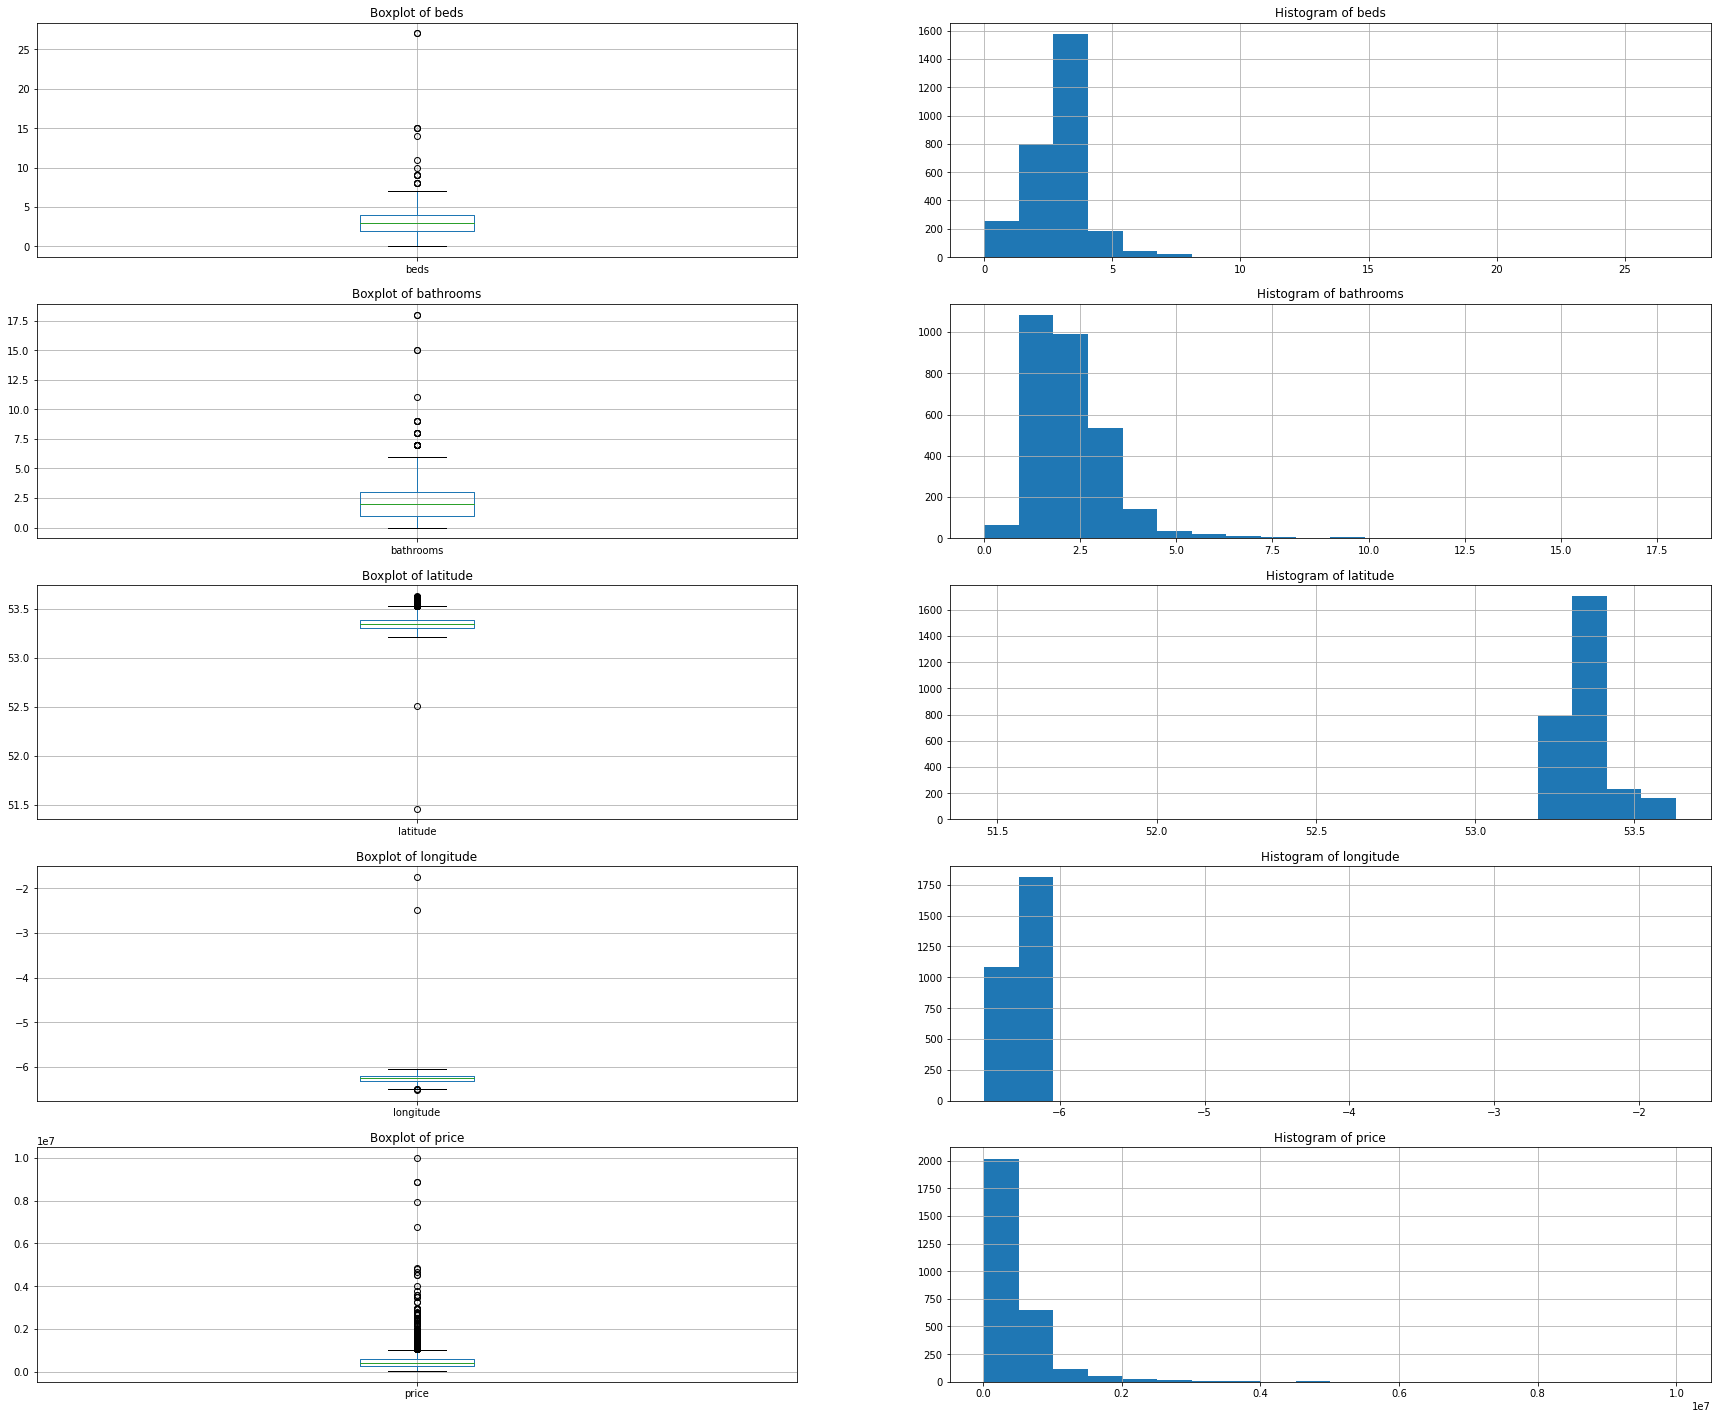

(2892, 10)


In [33]:
#Select features to include in plots
include_featues = ['beds','bathrooms', 'latitude', 'longitude', 'price']

plot_box_hist(df_train, include_featues)
print(df_train.shape)

In [34]:
print("Plot after outliers have been removed")
for i in range(0, len(include_featues)): 
    df_train = remove_outliers(df_train,include_featues[i])

    
# Removing location that are outside of Ireland From Nigel Portley
df_train['latitude'] = (df_train['latitude'] -51.45843)/2.173 
df_test['latitude'] = (df_test['latitude'] -51.45843)/2.173 

df_train['longitude'] = (df_train['longitude'] + 6.521187) 
df_test['longitude'] = (df_test['longitude'] + 6.521187)

df_train['bathrooms'].values[df_train['bathrooms'].values > 7 ] = 7
df_test['bathrooms'].values[df_test['bathrooms'].values > 7 ] = 7

df_train['beds'].values[df_train['beds'].values > 10 ] = 10
df_test['beds'].values[df_test['beds'].values > 10 ] = 10

df_train.drop('ad_id', axis=1, inplace=True)
df_test.drop('ad_id', axis=1, inplace=True)

Plot after outliers have been removed


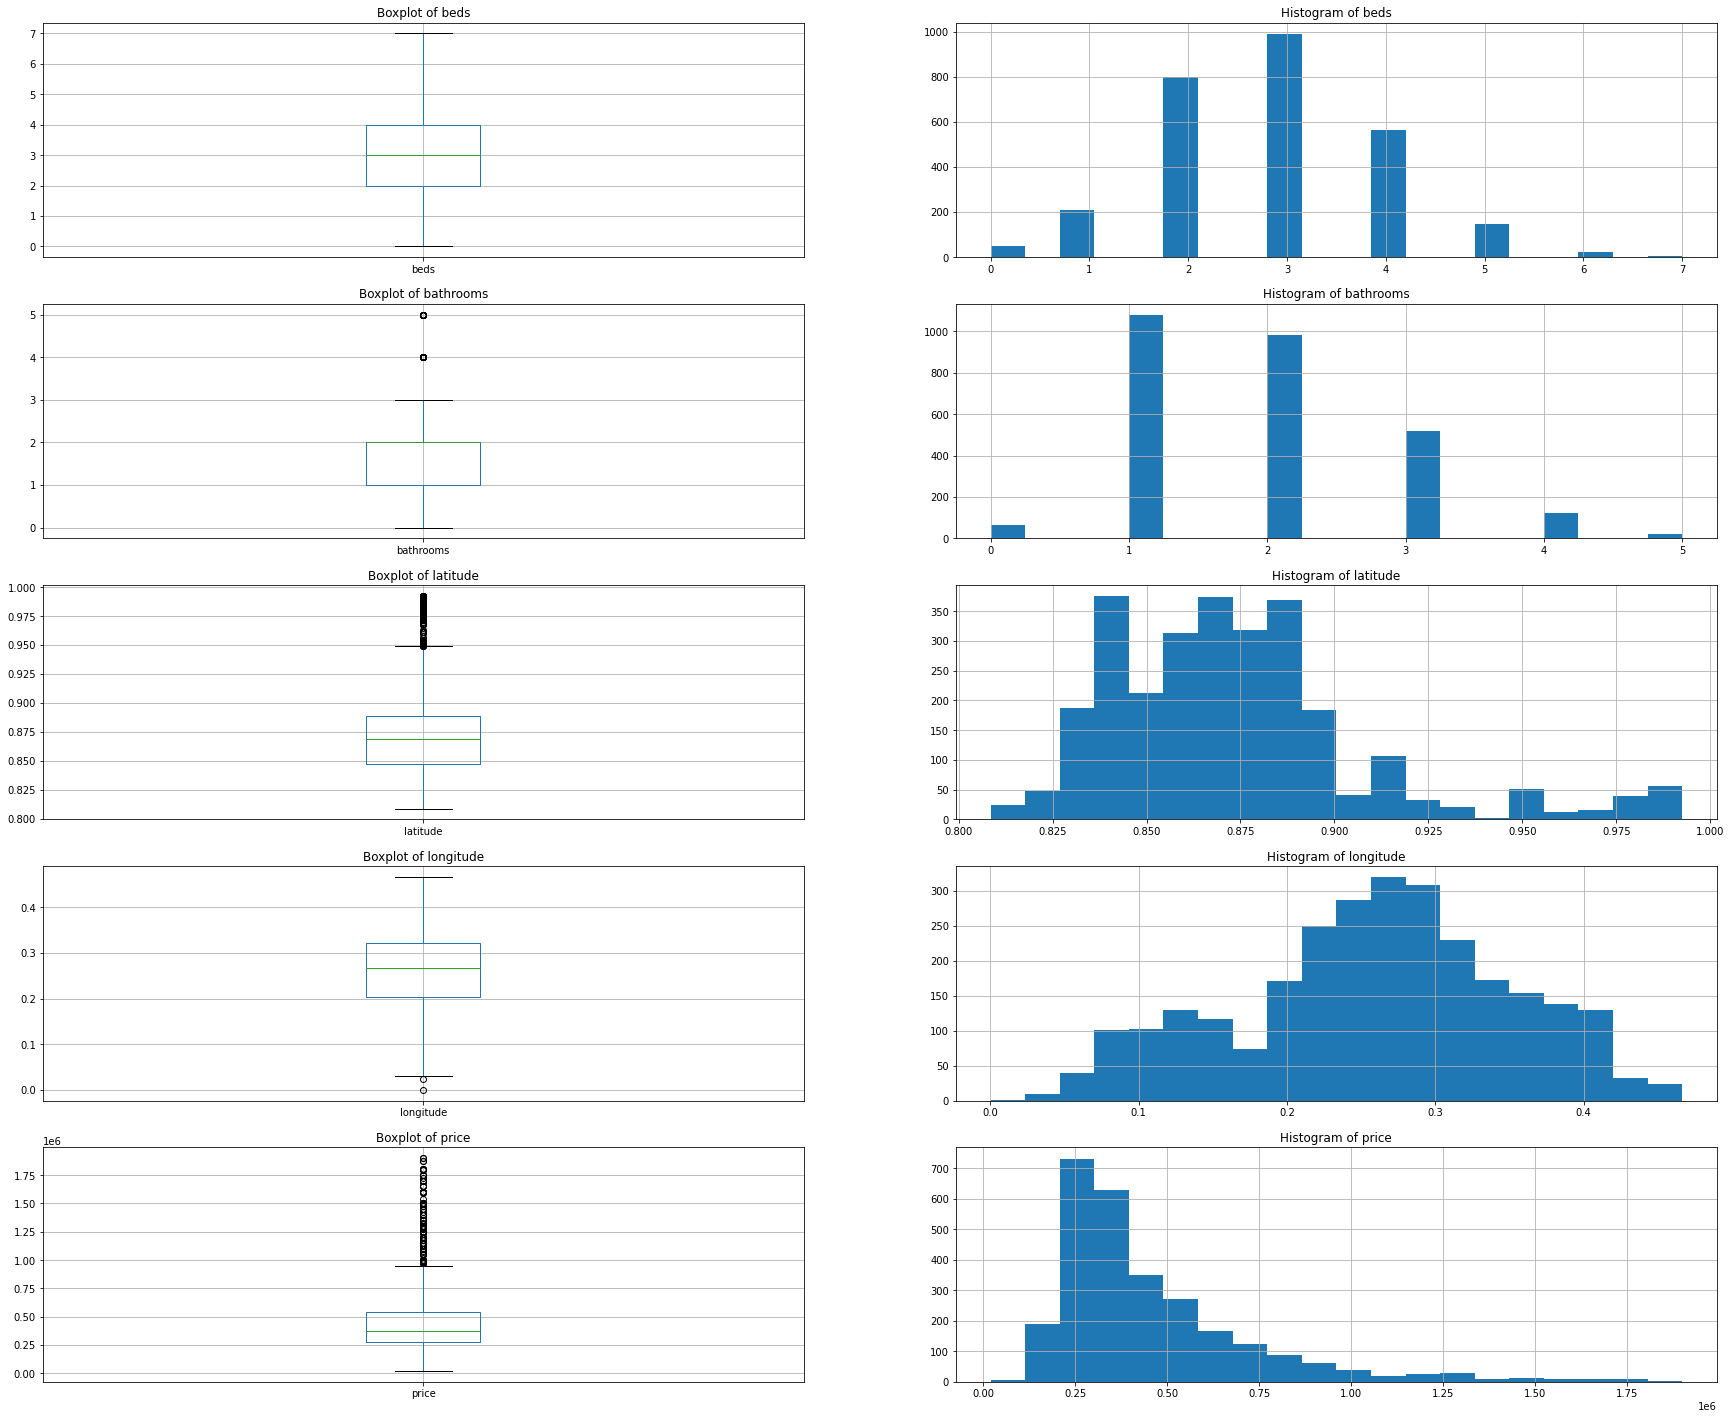

(2785, 9)


In [35]:
plot_box_hist(df_train, include_featues)
print(df_train.shape)

## 2. Price Data

We examine Price dataset from *true_price.csv*

### 1.1 Variable Identification

In [36]:
print('Shape of House Pricing Data : ', df_cost.shape)

print('Cost Data Columns',df_cost.columns)

print(df_cost.info())

df_cost.head(5)

Shape of House Pricing Data :  (500, 2)
Cost Data Columns Index(['Id', 'Expected'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Id          500 non-null int64
Expected    500 non-null float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB
None


,Id,Expected
0,12373510,875000.0
1,12422623,355000.0
2,12377408,440000.0
3,12420093,425000.0
4,12417338,265000.0


### 1.2 Univariate Analysis

In [37]:
df_cost.describe()

,Id,Expected
count,5.000000e+02,5.000000e+02
mean,1.231695e+07,5.810356e+05
std,1.485832e+05,6.009194e+05
min,1.130615e+07,8.500000e+04
25%,1.228617e+07,2.950000e+05
50%,1.237964e+07,4.250000e+05
75%,1.240544e+07,5.950000e+05
max,1.242809e+07,5.750000e+06


### 1.3 Multi Variate Analysis

### 1.4 Missing Value Treatment

In [38]:
print('Test House Pricing Missing Values')
print(df_cost.isna().sum())

Test House Pricing Missing Values
Id          0
Expected    0
dtype: int64


### 1.5 Outlier Treatment

In [39]:
df_cost.drop('Id', axis=1, inplace=True)

***


In [40]:
# print(df_train_p.select_dtypes(exclude=['object']).isna().sum())

In [41]:
print(df_train.isna().sum())
df_train.isna().sum()*100/len(df_train)

area                  0
bathrooms             0
beds                  0
ber_classification    0
latitude              0
longitude             0
price                 0
property_category     0
property_type         0
dtype: int64


area                  0.0
bathrooms             0.0
beds                  0.0
ber_classification    0.0
latitude              0.0
longitude             0.0
price                 0.0
property_category     0.0
property_type         0.0
dtype: float64

In [42]:
print(df_test.isna().sum())
df_test.isna().sum()*100/len(df_test)

area                  0
bathrooms             0
beds                  0
ber_classification    0
latitude              0
longitude             0
property_category     0
property_type         0
surface               0
dtype: int64


area                  0.0
bathrooms             0.0
beds                  0.0
ber_classification    0.0
latitude              0.0
longitude             0.0
property_category     0.0
property_type         0.0
surface               0.0
dtype: float64

***

# Training & Test Data

## Train Dataset

In [43]:
df_train.shape

(2785, 9)

In [ ]:
df_train.describe()

In [ ]:
df_train.sample(3)

## Test Dataset

In [44]:
df_test.shape

(500, 9)

In [ ]:
df_test.describe()

In [ ]:
df_test.sample(3)

## Expected Cost dataset

In [ ]:
df_cost.shape

In [ ]:
df_cost.describe()

In [ ]:
df_cost.sample(4)

***


# PIECEWISE REGRESSION

In [45]:
# Feature selection using XGBoost[1]
from xgboost import XGBClassifier
from xgboost import plot_importance

#Remove Property ID
df_train_final = df_train.copy()

# For train/test split
X = df_train_final.drop('price',axis=1)
y = df_train_final['price']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
fi_Model = XGBClassifier()
fi_Model.fit(X_train, y_train)
plt.rcParams["figure.figsize"] = (28, 14)
plot_importance(fi_Model)
plt.show();

## Full Model

In [ ]:
# select some features columns just for the baseline model
# assume not all of the features are informative or useful
# in this exercise you could try all of them if possible

featrain = ['latitude','longitude','ber_classification', 'beds', 'bathrooms', 'price']
# dropna: remove missing values
df_subset_train = df_train[featrain].dropna(axis=0)

featest = ['latitude','longitude', 'surface','ber_classification', 'beds', 'bathrooms']
df_subset_test  =  df_test[featest].dropna(axis=0)

# cost
df_cost = df_cost[df_cost.index.isin(df_subset_test.index)]

In [ ]:
print('Number of nan in df_subset_train dataset: ',X_train.isnull().sum().sum())
print('Number of nan in df_subset_test dataset: ',X_test.isnull().sum().sum())

In [ ]:
# train set, input columns
Xs_train = df_subset_train.iloc[:,0:-1].values 
# train set, output column, cost
ys_train = df_subset_train.iloc[:,-1].values.reshape(-1,1)   

# test set, input columns
Xs_test = df_subset_test.iloc[:,0:].values 
# test set, output column, cost
y_test = df_cost.Expected.values

In [ ]:
Xs_train.shape

In [ ]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

In [ ]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])
    

In [ ]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [ ]:
# samples from the posterior
posterior = approximation.sample(5000)

In [ ]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_test))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test) / y_test)))

## Clustering

### Full Model

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)


### Clusters

In [ ]:
# train clusters



In [ ]:
# test clusters


## Piecewise Model

In [ ]:
# model_0
with pm.Model() as model_0:
    # prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    # we have a beta for each column of Xn0
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
    # prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    # linear regression relationship
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn0.T)
    # likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

##Simulations

### Only Cluster 0

## Overall

## Test set performance

### PPC on the Test set



# SUMMARY

## References

### Observations
* **House Data** (house_train.csv, house_test.csv):  Describes Different attributes that determines house price
* **Price Data** (true_price.csv): Real cost of the houses
* True Price has 500 rows x 2 cols and no missing values. Id column dropped 
* Training Data has 2982 rows x 17 cols. Abundant missing values. Have been dealt with in EDA section. 9 Categorical and 8 numerical attributes.
* Test Data has 500 rows x 16 cols. Has missing values. Have been dealt with in EDA section.
* Some categorical  attributes were kept ( after converting to numerical values) in the final dataset 

### Numerical Atributes
* `no_of_units` dropped as it has huge missing values in both datasets.
* 
* `price` had missing values, was dropped. 
* `latitude` and `longitude` had no missing values. The outliers were removed following Nigel Portley's procedure.

### Categorical Attributes
* `area` : encoded with a single numerical value. It is clean and efficient replacement. But I wonder if it will affect the final model. Maybe using get_Dummies is another way. 
* `county` and `environment` had Dublin and Prod as values. They will not be that much information and were dropped.
* `ber_classification` encoded with a numerical value 
* Columns with desctiptive text  as `description_block`, `facility` & `features` were dropped.
* `property_category` & `property_type` were encoded into numerical  values. 

A lot of time was consumed in Analysing and processing of data. The EDA phase. As mentioned above various columns were dropped for being redundant in nature or missing values. A number of categorical attributes were also encoded.  Outliers were also removed. But taking different strategies. 

After EDA part ( the pre-processing) the new shape of train data and test data  was 2785x9 and 500x9 respectively.

## Bibliography

Setia, M., 2020. Exploratory Data Analysis : The Tool Understand Your Data. [online] Analytics Vidhya. Available at: <https://www.analyticsvidhya.com/blog/2020/10/the-clever-ingredient-that-decide-the-rise-and-the-fall-of-your-machine-learning-model-exploratory-data-analysis/>.

